# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

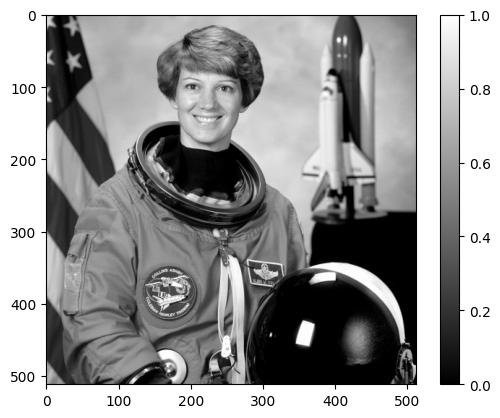

In [4]:
img_in = plt.imread("data/astronaut.png")
plt.imshow(img_in, "gray")
plt.colorbar()



**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

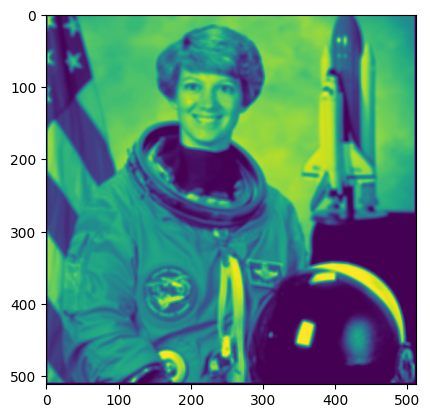

In [8]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        Anzahl = 0
   
        if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1] -n :  
            for q in numpy.ndindex(size, size):
                i = (p[0] + q[0]) - n
                j = (p[1] + q[1]) - n
                neighborhood_sum += img_in[i, j]
                Anzahl += 1
            result[p] = neighborhood_sum / Anzahl
    return result

img_1=img_in.copy()
img_mean = meanfilter(img_1, size=5)
plt.imshow(img_mean)


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

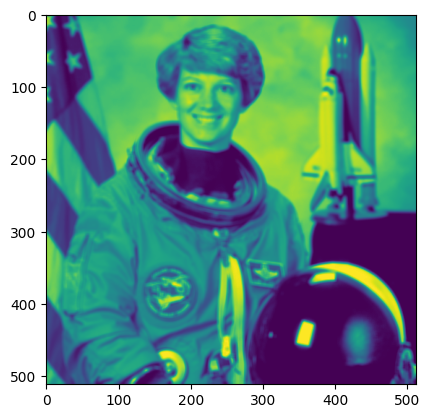

In [ ]:
img_mean = meanfilter(img_in, size=5)
plt.imshow(img_mean)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [ ]:
img_correct = plt.imread("data/astronaut_meanfilter5.png")
assert numpy.allclose(img_mean, img_correct, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

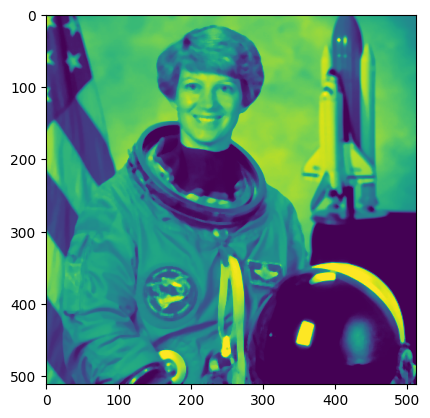

In [6]:
def medianfilter(img_in, size):
    result= numpy.zeros(img_in.shape)
    n = (size-1) // 2
    for p in numpy.ndindex(img_in.shape):
        median_list = []

        if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1]-n:
            median_list = []

            for q in numpy.ndindex(size,size):
                i=(p[0] + q[0]) - n
                j=(p[1]+ q[1])-n
                median_list.append(img_in[i,j])
                median_list.sort()
            m= len(median_list)

            if m % 2 == 0:
                median = (median_list[m // 2 -1] + median_list[m //2]) /2
            else:
                median = median_list[m//2]
                result[p] = median
        else:
            result[p]=img_in[p]
    return result
img_2= img_in.copy()
img_median = medianfilter(img_2, size=5)
plt.imshow(img_median)

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

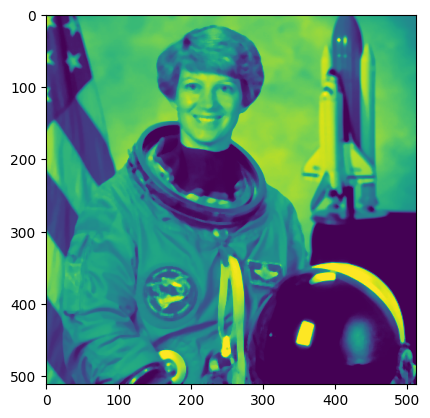

In [47]:
img_2= img_in.copy()
img_median = medianfilter(img_2, size=5)
plt.imshow(img_median)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [45]:
img_correct_median = plt.imread("dara/astronaut_medianfilter5.png")
assert numpy.allclose(img_median, img_correct_median, atol=1/255)

FileNotFoundError: [Errno 2] No such file or directory: 'dara/astronaut_medianfilter5.png'

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: